# Metaprogramming Workshop

## Workshop Outline
In this workshop, I shall discuss first the concept and uses of metaprogramming. 

Following this I will explain and demonstrate how to implement metaprogramming in Python using decorators.

## Introduction - What is Metaprogramming?
Metaprogramming is the process of writing code which manipulates existing code, such as functions or classes. 

Instead of acting on data or inputs as most code, metaprogramming code acts code.


You may have used metaprogramming without knowing it, for example writing higher order functions, which are functions which take functions as arguments. 
Metaprogramming can go beyond this and tends to add an extra operations or properties to functions and classes.

A simple example of this is to add a timing feature to a function, so that as well as carrying out it's usual process, the function also times how long that takes and prints, as well as returning the original functions output. 

Metaprogramming can improve: 
+ Time efficiency (using code that is already written) 
+ Memory efficiency (less functions needed)
+ Usability (the function can be adapted to peform the exact process for the current problem being solved)
+ Facility (most metaprogramming techniques are straightforward to implement as long as you know the procedure to follow)
+ Flexibility 
 - Multiple decorators can be used on the same function to adapt the same piece of code to different situations without repeating it. This also makes it easy to modify or extend many uses of the code at once, by modifying the 
 - Conversely the same decorator can be applied to many functions to extend - for example the @timethis decorator discussed above could be applied to time many functions and compare efficiencies
+ Readability (lengthy repetitive code is hard to follow)


Metaprogramming can eliminate code repetition without introducing inheritance classes or multiple similar functions. 

Taken to it's extreme, metacode can alter itself as it's running, and can be used to solve problems that would otherwise take multiple runs and human-input, or to update itself to live situations without requiring additional input and modifications as the dependent relationship varies. This can be extremely useful in many fields. An example of usefullness would be a program working in financial markets, which would depend upon the current, complex relationships between different currencies. As well as depending on each other, in a complex way, currencies are also subject to external and unpredictable factors, such as political events, natural disasters, etc... Metaprogramming could be used to measure and adjust for these unpredictable changes in the performance of different currencies. For example, if Putin makes another 'controversial' act resulting in further sanctions from USA and Europe and a consequential decrease in the value of the Ruble, or an oil-field is found in Brazil causing increase in the value of the Real, or Britain leaves Europe, changing the dependency relationships between the pound and the Euro, the metafunction could be used to observe the new relationship and update the program itself accordingly - creating new functions defining the new relationships.

It's also used to sort big-data, for example see the YouTube talk at: https://www.youtube.com/watch?v=rXj5nayS7Yg 

In this workshop, we only look at metaprogramming in Python, but metaprogramming is a concept that can be used in other languages, for example: 
+ C++ ![](screenshot.png)
+ Ruby ![](screenshot 6.png)
+ Java ![](screenshot 2.png)
+ Julia ![](screenshot 5.png)
+ Fortran ![](screenshot 4.png)

In this workshop, we are focussing on Python because of the familiarity with the FEEG6003 (Advanced Computational Methods II) students with Python.

![](python.png)
In Python, there are 3 main tools we can use to implement metaprogramming: 
+ Decorators
+ Metaclasses
+ Descriptors

In this presentation, we will focus on Decorators.





Finally, for further reading on metaprogramming in Python, I can recomend the folowing resources: 
+ YouTube video by David Beazley: https://www.youtube.com/watch?v=sPiWg5jSoZI
+ Python Cookbook, 3rd Edition, Brian K. Jones and David M Beazley, O'Reilly Media 
+ Python in a Nutshell, Alex Martelli, O'Reilly  

## Decorators Explained
A decorator is defined independently of any particular function, method or class, but acts on them to alter their behaviour. 

We will use the following properties of functions: 
+ Functions can be assigned to variables
+ Functions can be defined within a function, and are called inner functions (the function they are defined within is called the outer function)

 Note: Inner functions have read only access to the outer scope
 

+ Functions can be passed as variables to a function
+ Functions can be returned as output from a function



We will also use the terms \*args and \*\*kwargs, to refer to a variable number of arguments/parameters and keyword arguments/parameters correspondingly.

## Function Decorators Example

In [24]:
# First import required packages
import time
from functools import wraps

def recordit(func):
    """ A decorator that reports the execution time"""
    @wraps(func)
    def wrapper(*args, **kwargs):
        starttime = time.strftime("%H:%M:%S")
        date = time.strftime("%x")
        result = func(*args, **kwargs)
        # end = time.time()
        arguments = []
        kwarguments = []
        for arg in args: 
            arguments.append(arg)
        for kwarg in kwargs: 
            kwarguments.append(arg)
        print('Function used was {}').format(func.__name__)
        print('Arguments were {}').format(arguments)
        print('Keyword arguments were {}').format(kwarguments)
        print('Function was executed at {} on {} \n').format(starttime, date)
        return result
    return wrapper

### Decorator Rules:
1. To apply a decorator (e.g. mydecorator) to a function (e.g. myfunction) use the syntax: 
 ```python
 @mydecorator
 def myfunction(): 
     ...
 ```
 instead of: 
 ```python
 myfunction = mydecorator(myfunction)```
 For example, we would write:
 ```python
 @timethis
 def testfunction():
     ...
     ```
 
2. When defining the DECORATOR function, include the @wraps line. 
 You will see why in exercise 1.
+ Refer to the arguments as \*args and \*\*kwargs, to allow for an unknown number of parameters to be passed
+ Return the result of the original function in your wrapper function
+ Return the wrapper as the last line

### Apply our decorator to a function:

Populating the interactive namespace from numpy and matplotlib


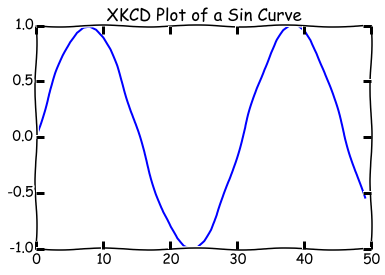

Function used was importantplotter
Arguments were [10]
Keyword arguments were []
Function was executed at 13:27:27 on 04/28/16 



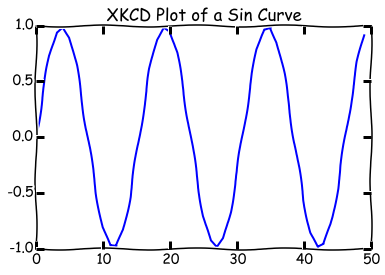

Function used was importantplotter
Arguments were [20]
Keyword arguments were []
Function was executed at 13:27:28 on 04/28/16 



In [25]:
%pylab inline

@recordit
def importantplotter(n):
    plt.xkcd()  # Produces XKCD Style Plots
    plt.plot(sin(linspace(0, n)))
    plt.title('XKCD Plot of a Sin Curve')
    show() 
    
importantplotter(10)
importantplotter(20)

### Removing a Decorator

To remove a decorator from a function, you can simply use the 
```python
.__wrapped__
```
attribute.

## Application
There are many more complex implementations of metaprogramming in Python than we have time to cover today. 

The next stage would be learning to pass arguments to decorators - which is not straightforward.

You can then make decorators for classes as well as functions, which is extremely useful and minimizes having multiple very similar classes and over-using inheritance.

As well as decorators, we have not discussed metaclasses and descriptors, but you can read about these in the resources:
+ Python Cookbook, 3rd Edition, Brian K. Jones and David M Beazley, O'Reilly Media 
+ Python in a Nutshell, Alex Martelli, O'Reilly 